In [13]:
from numpy import random
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd

In [52]:

def generate_dataframe(n_samples, n_subjects, sigma_observation, beta_variability, intercept_variability, measurement_noise, beta_group, intercept_group):

    y = np.zeros((n_subjects, n_samples))
    x = np.random.random((n_subjects, n_samples))


    for s in range(n_subjects):
        beta_subject = random.normal(loc=beta_group, scale=beta_variability)
        #beta_subject = beta_group + beta_variability #slope
        k_subject = random.normal(loc=intercept_group, scale=intercept_variability)
        #k_subject = k_group + observation_noise #intercept

        measurement_noise = random.normal(loc=0, scale=sigma_observation)

        y[s] = beta_subject * x[s] + k_subject + measurement_noise

    df = pd.DataFrame(y)


    df.index = range(1, len(df) + 1) #index start at 1
    df.columns = range(1, len(df.columns) + 1) #columns start at 1

    return df






#parameters
n_samples    = 10
n_subjects   = 10
effect = np.zeros(n_subjects)
observation_noise     = 1/math.sqrt(2)
beta_variability      = 1
intercept_variability = 1/math.sqrt(2)
sigma_observation     = 1/math.sqrt(2)

#beta_group = random.normal(loc=beta_group, scale=beta_std**2, shape=n_samples) #loc=mean, scale=std, size=shape of returned array
beta_group = 0
#k_group = random.normal(loc=k_group, scale=k_std**2)
intercept_group = 0


df = generate_dataframe(n_samples, n_subjects, observation_noise, beta_variability, intercept_variability, sigma_observation, beta_group, intercept_group)


df


,1,2,3,4,5,6,7,8,9,10
1,1.181646,1.171391,1.224268,1.126155,0.918336,0.915262,0.998472,1.011667,1.002487,1.191258
2,0.207772,0.149701,0.223607,0.233099,0.172070,0.243606,0.251249,0.144680,0.212968,0.253189
3,1.243556,1.143109,1.575860,0.497540,1.282626,1.355908,1.341846,1.459735,0.731762,0.694330
4,0.141493,-0.238269,-0.401736,-0.313267,-0.542870,-0.962515,-1.100174,-0.804365,-0.483589,-0.335459
5,0.216809,-1.140091,0.148094,0.819688,0.645928,-1.059140,-1.026554,-1.070379,-1.203446,-0.336993
6,-2.140988,-1.951562,0.175456,-0.352890,-0.058304,0.458568,-1.531915,0.012167,-1.361354,-0.903892
7,-0.687532,0.238759,-0.025082,-0.092578,0.251030,-0.314931,-0.621405,-0.709595,0.209968,-0.547024
8,0.864660,-0.019540,0.456859,0.865606,-0.055496,0.132814,0.781386,0.613609,0.310059,0.648244
9,0.722669,0.704373,0.686401,0.676667,0.760726,0.685506,0.757867,0.732432,0.736698,0.732193
10,0.352436,0.477162,0.044574,-0.203213,-0.087519,-0.160108,0.604144,-0.252386,0.454398,0.166578


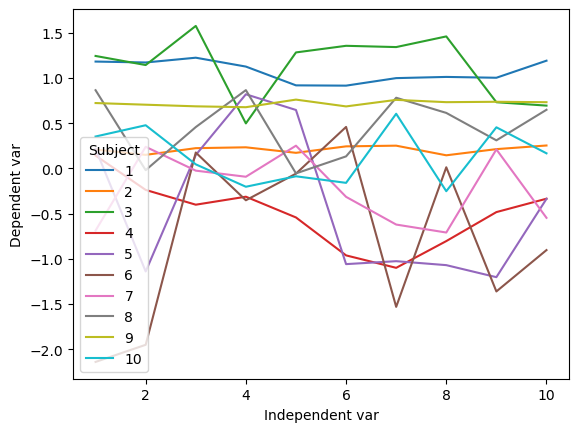

In [53]:
plt.plot(df.T)
plt.legend(df.index, title="Subject")
plt.xlabel("Independent var")
plt.ylabel("Dependent var")
plt.show()